# **取得股價資料**

In [1]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [3]:
# 輸入股票代號
stock_id = "2408.tw"
# stock_id = "2408.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=360)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-1478725006.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-23,46.650002,47.450001,46.200001,46.299999,14076581
1,2024-09-24,46.349998,46.500000,45.700001,46.049999,10958000
2,2024-09-25,47.299999,47.450001,46.799999,46.799999,13591103
3,2024-09-26,47.299999,50.099998,47.299999,50.000000,26942791
4,2024-09-27,48.150002,48.650002,47.650002,47.700001,21725671
...,...,...,...,...,...,...
235,2025-09-11,56.500000,59.000000,55.400002,55.500000,167700689
236,2025-09-12,57.400002,60.500000,55.500000,59.299999,186640192
237,2025-09-15,63.099998,63.099998,57.400002,60.099998,253763410
238,2025-09-16,69.199997,69.400002,63.599998,65.000000,442109391


# 1. 技術指標的計算
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）

1.1 **計算簡單移動平均線（SMA）**

In [4]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA
235,2025-09-11,56.500000,59.000000,55.400002,55.500000,167700689,51.43750,49.780770,48.5775
236,2025-09-12,57.400002,60.500000,55.500000,59.299999,186640192,52.90625,50.546154,49.0475
237,2025-09-15,63.099998,63.099998,57.400002,60.099998,253763410,55.00000,51.723077,49.8350
238,2025-09-16,69.199997,69.400002,63.599998,65.000000,442109391,57.62500,53.457692,51.0075
239,2025-09-17,73.300003,73.699997,67.699997,69.199997,352674976,60.16250,55.480770,52.4450


1.2 **計算相對強弱指數（RSI）**

In [5]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
235,2025-09-11,56.500000,59.000000,55.400002,55.500000,167700689,51.43750,49.780770,48.5775,2.099998,2.099998,0.0,0.975000,0.178571,5.460007,84.520142
236,2025-09-12,57.400002,60.500000,55.500000,59.299999,186640192,52.90625,50.546154,49.0475,0.900002,0.900002,0.0,0.925000,0.178571,5.180007,83.818788
237,2025-09-15,63.099998,63.099998,57.400002,60.099998,253763410,55.00000,51.723077,49.8350,5.699997,5.699997,0.0,1.296428,0.178571,7.260009,87.893475
238,2025-09-16,69.199997,69.400002,63.599998,65.000000,442109391,57.62500,53.457692,51.0075,6.099998,6.099998,0.0,1.707142,0.178571,9.560012,90.530314
239,2025-09-17,73.300003,73.699997,67.699997,69.199997,352674976,60.16250,55.480770,52.4450,4.100006,4.100006,0.0,2.000000,0.096428,20.740764,95.400346


1.3 **計算平滑異同移動平均線（MACD）**

In [6]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-09-23,46.650002,47.450001,46.200001,46.299999,14076581,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,46.650002,46.650002,0.00000
1,2024-09-24,46.349998,46.500000,45.700001,46.049999,10958000,NaN,NaN,NaN,-0.300003,0.000000,0.300003,NaN,NaN,NaN,NaN,46.583334,46.607144,-0.02381
2,2024-09-25,47.299999,47.450001,46.799999,46.799999,13591103,NaN,NaN,NaN,0.950001,0.950001,0.000000,NaN,NaN,NaN,NaN,46.742593,46.706123,0.03647


# **2. 資料可視化**
K 線型態的捕捉

# 2.1 可視化收盤價折線圖

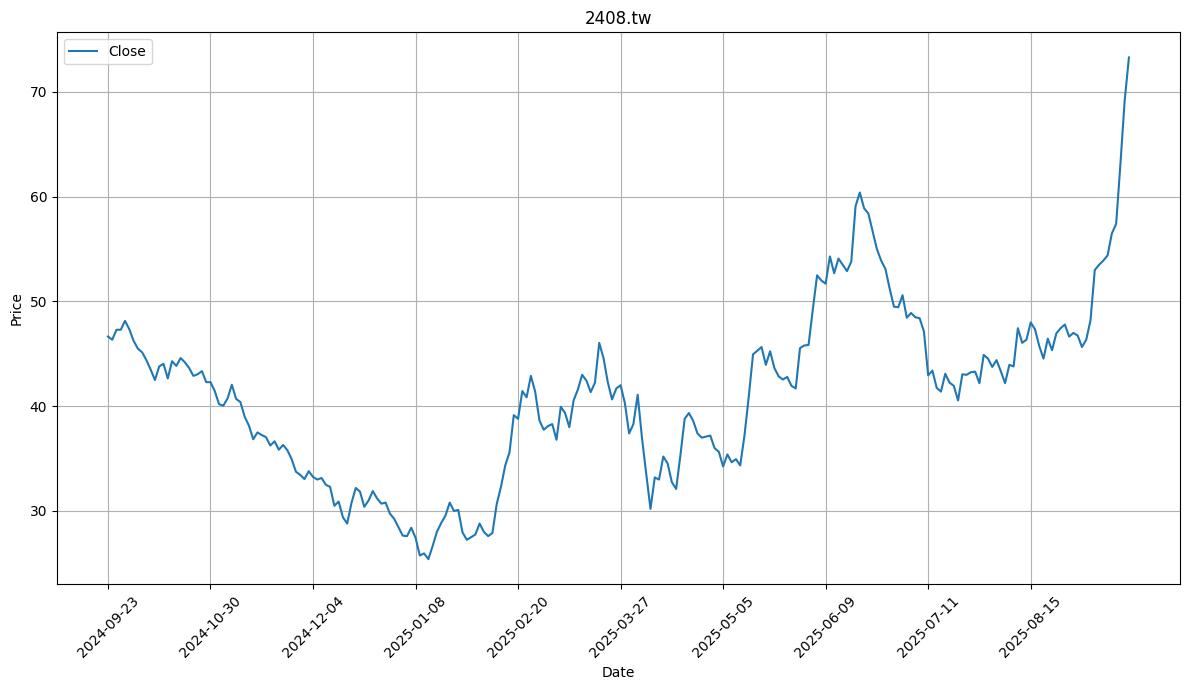

In [7]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

# 2.2 加入技術指標

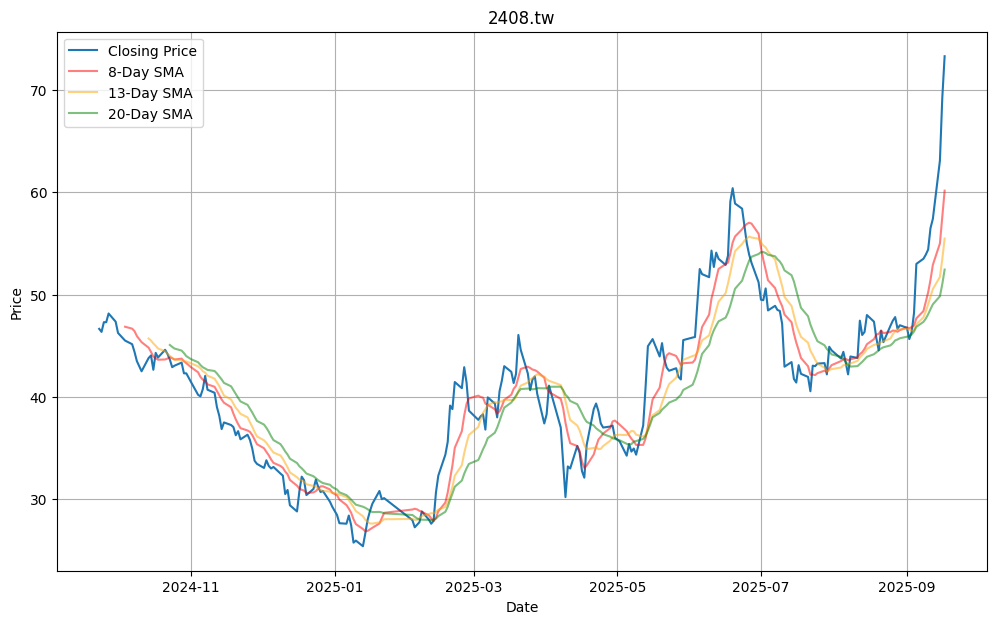

In [8]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='8-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

# 2.3 K 線

In [9]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


In [10]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-17'].tail()

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,
2025-09-11,56.500000,59.000000,55.400002,55.500000,167700689,51.43750,49.780770,48.5775,2.099998,2.099998,0.0,0.975000,0.178571,5.460007,84.520142,52.442608,50.850810,1.591798
2025-09-12,57.400002,60.500000,55.500000,59.299999,186640192,52.90625,50.546154,49.0475,0.900002,0.900002,0.0,0.925000,0.178571,5.180007,83.818788,53.544251,51.786409,1.757842
2025-09-15,63.099998,63.099998,57.400002,60.099998,253763410,55.00000,51.723077,49.8350,5.699997,5.699997,0.0,1.296428,0.178571,7.260009,87.893475,55.667750,53.402636,2.265114
2025-09-16,69.199997,69.400002,63.599998,65.000000,442109391,57.62500,53.457692,51.0075,6.099998,6.099998,0.0,1.707142,0.178571,9.560012,90.530314,58.674916,55.659402,3.015515
2025-09-17,73.300003,73.699997,67.699997,69.199997,352674976,60.16250,55.480770,52.4450,4.100006,4.100006,0.0,2.000000,0.096428,20.740764,95.400346,61.924935,58.179488,3.745448


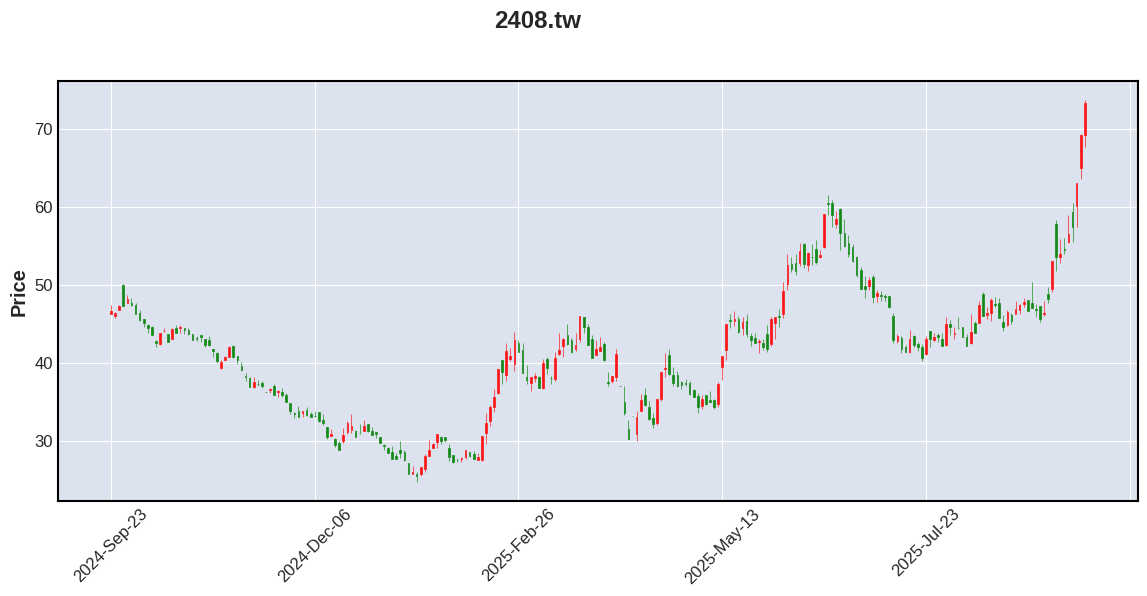

In [11]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

# 2.4 捕捉 Hammer 型態

In [12]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

#print('df',df)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-03,33.799999,33.799999,33.000000,33.549999,16050060,34.61875,35.511538,36.9775,0.75,0.75,...,0.160715,0.471429,0.340909,25.423743,34.541674,35.482986,-0.941312,0.250000,0.549999,0.0
2025-06-02,45.799999,45.799999,43.099998,45.099998,122607664,43.35625,43.996154,41.1825,0.25,0.25,...,1.007143,0.392857,2.563636,71.938773,43.705784,42.899498,0.806286,0.700001,2.000000,0.0


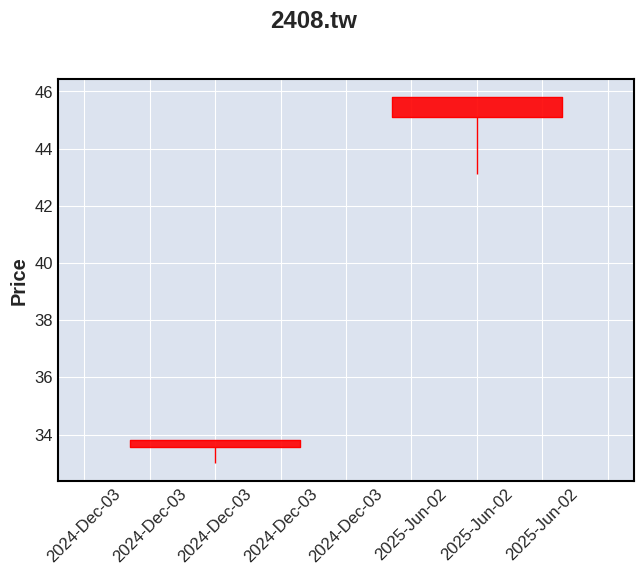

In [13]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

# 2.5 捕捉 Doji 型態

In [14]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-15,44.049999,44.500000,43.950001,44.000000,8138946,44.393750,45.507692,NaN,0.250000,0.250000,...,0.239286,0.425000,0.563025,36.021503,44.415744,44.966250,-0.550506,0.049999,0.049999,0.450001
2024-11-13,38.150002,38.700001,37.599998,38.250000,20027048,40.162500,41.057692,41.9950,-0.849998,0.000000,...,0.175000,0.567857,0.308176,23.557677,40.129910,40.864914,-0.735004,0.099998,0.550003,0.450001
2024-11-18,37.250000,37.750000,36.950001,37.299999,7909101,38.987500,39.742308,41.0350,-0.250000,0.000000,...,0.189286,0.625000,0.302857,23.245624,38.594457,39.515077,-0.920620,0.049999,0.299999,0.450001
2024-11-20,36.250000,36.250000,36.250000,36.250000,13220274,37.806250,38.938462,40.2600,-0.799999,0.000000,...,0.189286,0.621429,0.304598,23.348026,37.806523,38.746791,-0.940268,0.000000,0.000000,0.000000
2024-11-25,36.299999,36.500000,35.599998,36.250000,15876673,36.712500,38.000000,39.2200,0.450001,0.450001,...,0.250000,0.517857,0.482759,32.558152,36.978103,37.822469,-0.844366,0.049999,0.650002,0.200001
2024-12-06,33.150002,33.849998,33.049999,33.200001,9388984,33.550000,34.557692,35.7725,0.150002,0.150002,...,0.125000,0.417857,0.299146,23.026347,33.792310,34.611297,-0.818987,0.049999,0.100002,0.649998
2024-12-23,31.000000,32.099998,30.799999,31.000000,13820919,30.662500,31.288462,32.2400,0.600000,0.600000,...,0.325000,0.525000,0.619048,38.235303,31.112170,31.597545,-0.485375,0.000000,0.200001,1.099998
2025-03-11,38.000000,38.299999,37.250000,38.049999,40452690,38.362500,39.407692,36.9925,-1.349998,0.000000,...,0.853572,0.682143,1.251309,55.581395,38.558121,37.994370,0.563751,0.049999,0.750000,0.250000
2025-03-31,37.400002,38.799999,37.049999,37.500000,43334420,41.875000,41.973077,40.8350,-2.899998,0.000000,...,0.789286,0.832143,0.948498,48.678417,40.740464,40.894852,-0.154388,0.099998,0.350002,1.299999


In [15]:
doji_df.index

DatetimeIndex(['2024-10-15', '2024-11-13', '2024-11-18', '2024-11-20',
               '2024-11-25', '2024-12-06', '2024-12-23', '2025-03-11',
               '2025-03-31', '2025-04-07', '2025-04-10', '2025-04-22',
               '2025-05-15', '2025-05-26', '2025-06-03', '2025-06-13',
               '2025-06-19', '2025-08-04', '2025-08-05', '2025-09-01',
               '2025-09-03', '2025-09-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

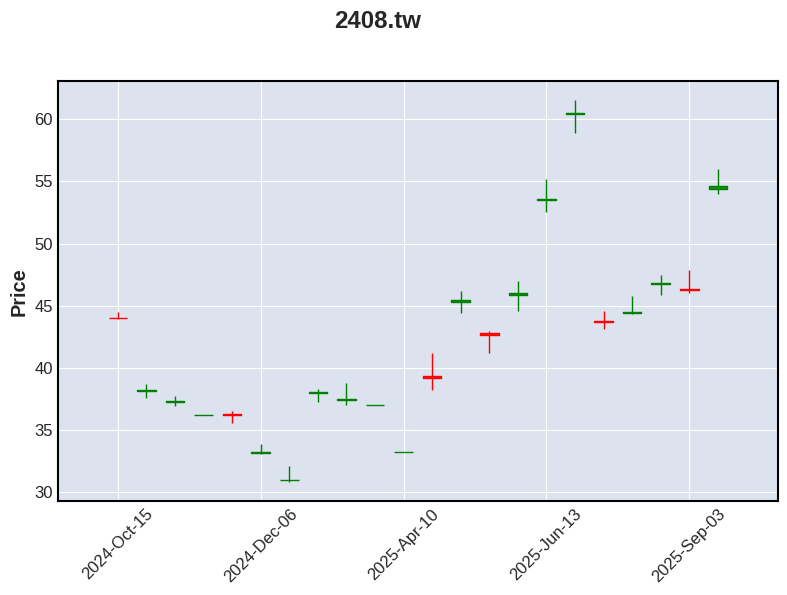

In [16]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# 3. **機器學習預測股價漲跌**
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

# 3.1 資料前處理

In [17]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [18]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((220, 3), (220,))

In [19]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176, 3), (44, 3), (176,), (44,))

# 3.2 線性回歸（Linear **Regression）**

In [20]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 3.57
線性回歸模型預測未來1天的價格: 62.01


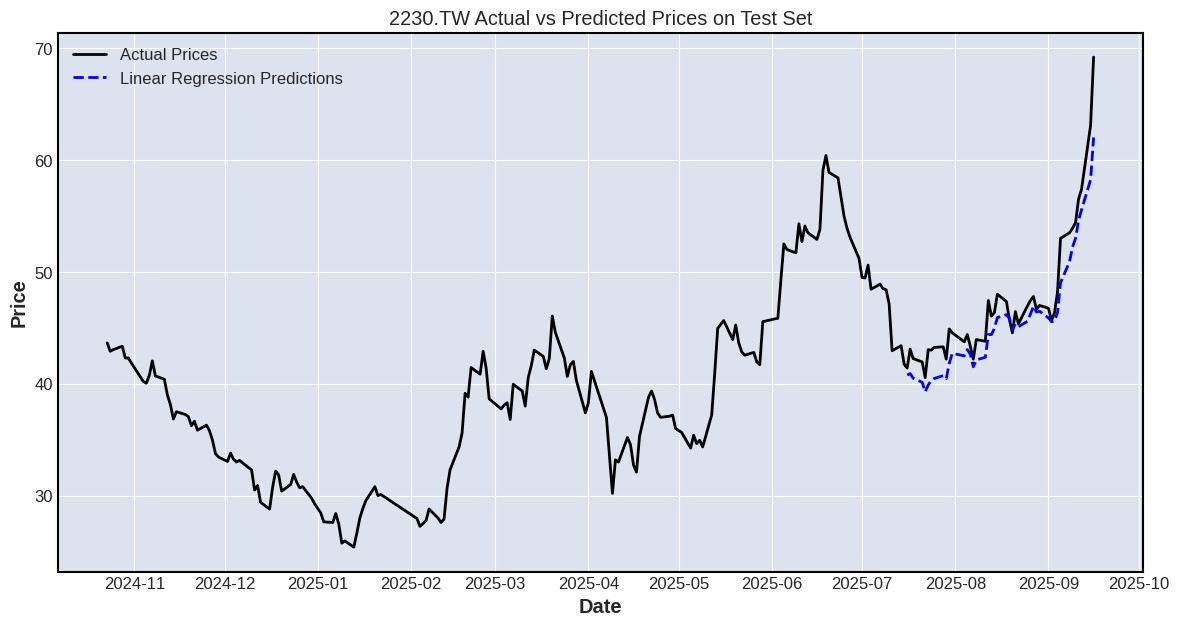

In [21]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 3.2 決策樹（Decision Tree）

In [22]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 4.05
決策樹模型預測未來1天的價格: 60.40


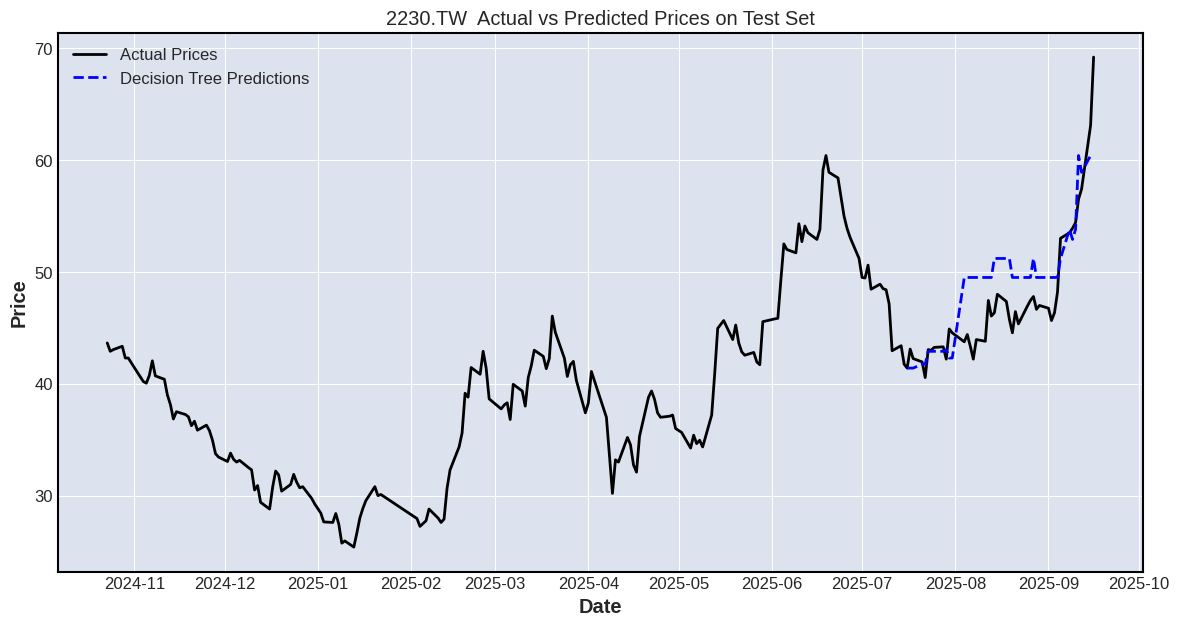

In [23]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 3.3 隨機森林（Random **Forest）**

In [24]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 3.34
隨機森林模型預測未來1天的價格: 59.22


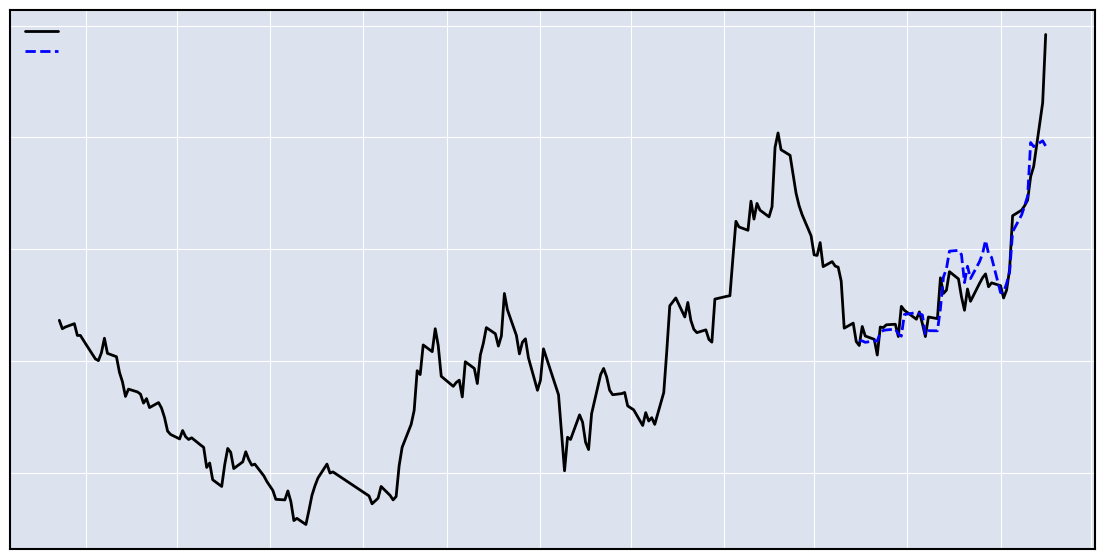

In [30]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_id} Actual vs Predicted Prices on Test Set') # Changed to use stock_id for title
plt.legend()
plt.grid(True)
plt.show()

